In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']

## 数据清洗

In [2]:
data = pd.read_csv(r"C:\Users\lihuiting\Desktop\数据分析案例应用\物流数据\data_wuliu.csv",encoding='gbk')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1159 non-null   object 
 1   订单行     1161 non-null   int64  
 2   销售时间    1161 non-null   object 
 3   交货时间    1161 non-null   object 
 4   货品交货状况  1159 non-null   object 
 5   货品      1161 non-null   object 
 6   货品用户反馈  1161 non-null   object 
 7   销售区域    1161 non-null   object 
 8   数量      1157 non-null   float64
 9   销售金额    1161 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 90.8+ KB


#### 通过info，可以看出包括10列数据，每列的名字，数据量和数据格式、
#### 1、订单号，货品交货情况和数量存在缺失值，缺失数据不多，可以考虑直接删除
#### 2、订单行对于我们的分析无关紧要，可以考虑直接删除列数据
#### 3、销售金额格式不对，（万元）和（元），以及逗号的问题。

In [3]:
data.drop_duplicates(keep='first',inplace=True)
data

,订单号,订单行,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,10,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,"1052,75元"
1,P096826,10,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,"11,50万元"
2,NaN,20,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,"11,50万元"
3,P097435,10,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,"6858,77元"
4,P097446,60,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,"129,58元"
...,...,...,...,...,...,...,...,...,...,...
1156,P299901,10,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,"200,41元"
1157,P302956,10,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,"79,44元"
1158,P303801,10,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,"194,08元"
1159,P307276,10,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,"32,18元"


In [4]:
data = data.dropna(axis=0,how='any')  #删除带有NA的整行数据(只要有Na就删除）
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1146 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1146 non-null   object 
 1   订单行     1146 non-null   int64  
 2   销售时间    1146 non-null   object 
 3   交货时间    1146 non-null   object 
 4   货品交货状况  1146 non-null   object 
 5   货品      1146 non-null   object 
 6   货品用户反馈  1146 non-null   object 
 7   销售区域    1146 non-null   object 
 8   数量      1146 non-null   float64
 9   销售金额    1146 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 98.5+ KB


In [5]:
data = data.drop('订单行',axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1146 entries, 0 to 1160
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1146 non-null   object 
 1   销售时间    1146 non-null   object 
 2   交货时间    1146 non-null   object 
 3   货品交货状况  1146 non-null   object 
 4   货品      1146 non-null   object 
 5   货品用户反馈  1146 non-null   object 
 6   销售区域    1146 non-null   object 
 7   数量      1146 non-null   float64
 8   销售金额    1146 non-null   object 
dtypes: float64(1), object(8)
memory usage: 89.5+ KB


In [7]:
data.reset_index(drop=True,inplace=True)


,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,"1052,75元"
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,"11,50万元"
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,"6858,77元"
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,"129,58元"
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,"32,39元"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1146 non-null   object 
 1   销售时间    1146 non-null   object 
 2   交货时间    1146 non-null   object 
 3   货品交货状况  1146 non-null   object 
 4   货品      1146 non-null   object 
 5   货品用户反馈  1146 non-null   object 
 6   销售区域    1146 non-null   object 
 7   数量      1146 non-null   float64
 8   销售金额    1146 non-null   object 
dtypes: float64(1), object(8)
memory usage: 80.7+ KB


#### 取出销售金额列，对每一个数据进行处理
#### 编写自定义函数，删除逗号，转成float类型数据，如果万元则*10000，否则删除元

In [12]:
def data_change(x):
    if ',' in x:
        x = x.replace(',','')
    if '万元' in x:
        x = x.replace('万元','')
    if '元' in x:
        x = x.replace('元','')
    x = float(x)
    return x
data['销售金额'] = data['销售金额'].apply(data_change)

0       105275.0
1         1150.0
2       685877.0
3        12958.0
4         3239.0
          ...   
1141     20041.0
1142      7944.0
1143     19408.0
1144      3218.0
1145    172092.0
Name: 销售金额, Length: 1146, dtype: float64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1146 non-null   object 
 1   销售时间    1146 non-null   object 
 2   交货时间    1146 non-null   object 
 3   货品交货状况  1146 non-null   object 
 4   货品      1146 non-null   object 
 5   货品用户反馈  1146 non-null   object 
 6   销售区域    1146 non-null   object 
 7   数量      1146 non-null   float64
 8   销售金额    1146 non-null   float64
dtypes: float64(2), object(7)
memory usage: 80.7+ KB


### 异常数据

In [14]:
data.describe() 

,数量,销售金额
count,1146.000000,1.146000e+03
mean,76.069372,8.378375e+04
std,589.416486,4.482279e+05
min,1.000000,0.000000e+00
25%,1.000000,2.937750e+03
50%,1.000000,9.301000e+03
75%,4.000000,3.513325e+04
max,11500.000000,9.259522e+06


#### 发现销售数量最小是0，金额最少却为1，说明存在异常数据，但是数量少，所以可以直接删除
#### 发生的典型的数据右偏，在电商行业很常见，符合2/8定律

In [17]:
data = data[data['销售金额']!=0]
data.describe()

,数量,销售金额
count,1145.000000,1.145000e+03
mean,76.134934,8.385692e+04
std,589.669861,4.484169e+05
min,1.000000,5.100000e+01
25%,1.000000,2.940000e+03
50%,1.000000,9.402000e+03
75%,4.000000,3.515200e+04
max,11500.000000,9.259522e+06


## 数据规整

In [19]:
data['销售时间'] = pd.to_datetime(data['销售时间'])
data['交货时间'] = pd.to_datetime(data['交货时间'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1145 entries, 0 to 1145
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单号     1145 non-null   object        
 1   销售时间    1145 non-null   datetime64[ns]
 2   交货时间    1145 non-null   datetime64[ns]
 3   货品交货状况  1145 non-null   object        
 4   货品      1145 non-null   object        
 5   货品用户反馈  1145 non-null   object        
 6   销售区域    1145 non-null   object        
 7   数量      1145 non-null   float64       
 8   销售金额    1145 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 89.5+ KB


In [20]:
data['月份'] = data['销售时间'].dt.month
data.head()

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额,月份
0,P096311,2016-07-30,2016-09-30,晚交货,货品3,质量合格,华北,2.0,105275.0,7
1,P096826,2016-08-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,1150.0,8
2,P097435,2016-07-30,2016-09-30,按时交货,货品1,返修,华南,2.0,685877.0,7
3,P097446,2016-11-26,2017-01-26,晚交货,货品3,质量合格,华北,15.0,12958.0,11
4,P097446,2016-11-26,2017-01-26,晚交货,货品3,拒货,华北,15.0,3239.0,11


## 数据分析

#### 配送服务是否存在问题？
#### 是否存在尚有潜力的销售领域？
#### 商品是否存在质量问题？

1、配送服务是否存在问题？

a、月度维度

In [21]:
data['货品交货状况'].value_counts()
#发现‘货品交货状况’这一列中有不合法空格

货品交货状况
 按时交货    992
 晚交货     118
按时交货      22
晚交货       13
Name: count, dtype: int64

In [22]:
data['货品交货状况'] = data['货品交货状况'].str.strip()
data['货品交货状况'].value_counts()
#改列的不合法空格已经被删除了

货品交货状况
按时交货    1014
晚交货      131
Name: count, dtype: int64

In [35]:
data1 = data.groupby(['月份','货品交货状况']).size().unstack()
data1

货品交货状况,按时交货,晚交货
月份,,
7,189,13
8,218,35
9,122,9
10,238,31
11,101,25
12,146,18


#### 按时交货率

In [38]:
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
data1

货品交货状况,按时交货,晚交货,按时交货率,h
月份,,,,
7,189,13,0.935644,0.931330
8,218,35,0.861660,0.858735
9,122,9,0.931298,0.924724
10,238,31,0.884758,0.881858
11,101,25,0.801587,0.796520
12,146,18,0.890244,0.885437


b、销售区域维度

In [39]:
data['销售区域'].value_counts() #没有发现异常数值

销售区域
马来西亚    326
华东      307
华北      253
泰国      187
西北       61
华南       11
Name: count, dtype: int64

In [43]:
data2 = data.groupby(['销售区域','货品交货状况']).size().unstack()
data2['按时交货率'] = data2['按时交货']/(data2['按时交货']+data2['晚交货'])
data2.sort_values(by = '按时交货率',ascending = False)
#西北地区按时交货率最低，存在突出的延时交货问题

货品交货状况,按时交货,晚交货,按时交货率
销售区域,,,
泰国,183,4,0.978610
马来西亚,310,16,0.950920
华南,10,1,0.909091
华北,226,27,0.893281
华东,268,39,0.872964
西北,17,44,0.278689


c、针对货品维度的分析

In [44]:
data['货品'].value_counts() #没有发现异常数值

货品
货品2    317
货品6    316
货品3    238
货品5    187
货品4     58
货品1     29
Name: count, dtype: int64

In [66]:
data3 = data.groupby(['货品'])['货品交货状况'].value_counts().unstack()
data3['按时交货率'] = data3['按时交货']/(data3['按时交货']+data3['晚交货'])
data3.sort_values(by = '按时交货率',ascending = False)
#货品4存在突出的延时交货问题

货品交货状况,按时交货,晚交货,按时交货率
货品,,,
货品5,183,4,0.978610
货品6,309,7,0.977848
货品1,27,2,0.931034
货品3,212,26,0.890756
货品2,269,48,0.848580
货品4,14,44,0.241379


d、货品和销售区域结合分析问题

In [50]:
data4 = data.groupby(['货品','销售区域','货品交货状况']).size().unstack()
data4['按时交货率'] = data4['按时交货']/(data4['按时交货']+data4['晚交货'])
data4.sort_values(by = '按时交货率',ascending = False)
#销售区域：最差在西北地区，货品为货品4和货品1，主要是货币4的交货时间晚导致的
#货品:最差的货品2，主要是马来西亚的交货时间较晚

货品交货状况     按时交货   晚交货     按时交货率
货品  销售区域                       
货品5 泰国    183.0   4.0  0.978610
货品6 马来西亚  309.0   7.0  0.977848
货品1 华北     14.0   1.0  0.933333
    华南     10.0   1.0  0.909091
货品3 华北    212.0  26.0  0.890756
货品2 华东    268.0  39.0  0.872964
货品4 西北     14.0  44.0  0.241379
货品2 马来西亚    1.0   9.0  0.100000
货品1 西北      3.0   NaN       NaN

2、是否存在有潜力的销售区域

a、月份

In [54]:
data1 = data.groupby(['月份','货品'])['数量'].sum().unstack()
data1

货品,货品1,货品2,货品3,货品4,货品5,货品6
月份,,,,,,
7,283.0,491.0,2041.5,414.0,733.0,1649.0
8,1413.0,3143.0,1045.0,1188.0,2381.0,1181.0
9,1693.0,3020.0,2031.0,NaN,271.0,343.0
10,4.0,28420.0,1684.0,2542.0,1984.0,2358.0
11,20.0,2042.0,100.0,3.0,14.0,383.0
12,4.0,18205.0,2172.0,1082.0,350.0,2487.0


<Axes: xlabel='月份'>

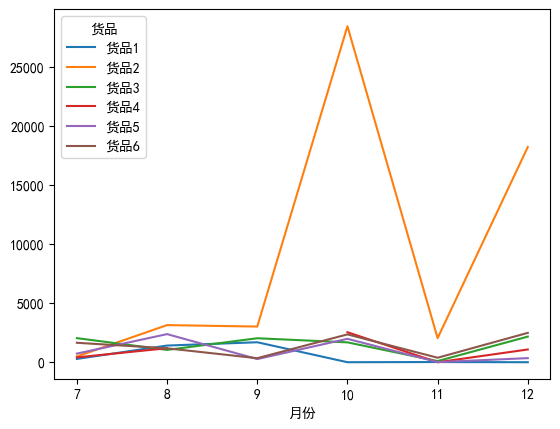

In [55]:
data1.plot(kind='line')

In [56]:
data1 = data.groupby(['销售区域','货品'])['数量'].sum().unstack()
data1

货品,货品1,货品2,货品3,货品4,货品5,货品6
销售区域,,,,,,
华东,NaN,53811.0,NaN,NaN,NaN,NaN
华北,2827.0,NaN,9073.5,NaN,NaN,NaN
华南,579.0,NaN,NaN,NaN,NaN,NaN
泰国,NaN,NaN,NaN,NaN,5733.0,NaN
西北,11.0,NaN,NaN,5229.0,NaN,NaN
马来西亚,NaN,1510.0,NaN,NaN,NaN,8401.0


<Axes: xlabel='销售区域'>

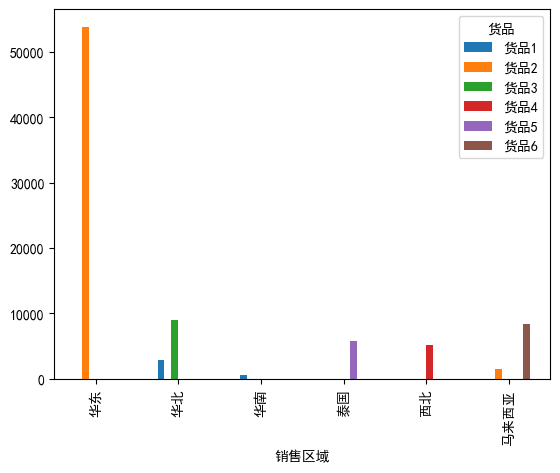

In [58]:
data1.plot(kind='bar')

In [59]:
data1 = data.groupby(['月份','销售区域','货品'])['数量'].sum().unstack()
data1

货品          货品1      货品2     货品3     货品4     货品5     货品6
月份 销售区域                                                 
7  华东       NaN    489.0     NaN     NaN     NaN     NaN
   华北       1.0      NaN  2041.5     NaN     NaN     NaN
   华南     282.0      NaN     NaN     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN   733.0     NaN
   西北       NaN      NaN     NaN   414.0     NaN     NaN
   马来西亚     NaN      2.0     NaN     NaN     NaN  1649.0
8  华东       NaN   1640.0     NaN     NaN     NaN     NaN
   华北    1410.0      NaN  1045.0     NaN     NaN     NaN
   华南       3.0      NaN     NaN     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN  2381.0     NaN
   西北       NaN      NaN     NaN  1188.0     NaN     NaN
   马来西亚     NaN   1503.0     NaN     NaN     NaN  1181.0
9  华东       NaN   3019.0     NaN     NaN     NaN     NaN
   华北    1409.0      NaN  2031.0     NaN     NaN     NaN
   华南     283.0      NaN     NaN     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN   271.0     NaN
   西北       1.0      NaN     NaN     NaN     NaN     NaN
   马来西亚     NaN      1.0     NaN     NaN     NaN   343.0
10 华东       NaN  28420.0     NaN     NaN     NaN     NaN
   华北       3.0      NaN  1684.0     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN  1984.0     NaN
   西北       1.0      NaN     NaN  2542.0     NaN     NaN
   马来西亚     NaN      NaN     NaN     NaN     NaN  2358.0
11 华东       NaN   2041.0     NaN     NaN     NaN     NaN
   华北       2.0      NaN   100.0     NaN     NaN     NaN
   华南       9.0      NaN     NaN     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN    14.0     NaN
   西北       9.0      NaN     NaN     3.0     NaN     NaN
   马来西亚     NaN      1.0     NaN     NaN     NaN   383.0
12 华东       NaN  18202.0     NaN     NaN     NaN     NaN
   华北       2.0      NaN  2172.0     NaN     NaN     NaN
   华南       2.0      NaN     NaN     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN   350.0     NaN
   西北       NaN      NaN     NaN  1082.0     NaN     NaN
   马来西亚     NaN      3.0     NaN     NaN     NaN  2487.0

In [60]:
data1['货品2']

月份  销售区域
7   华东        489.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        2.0
8   华东       1640.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚     1503.0
9   华东       3019.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        1.0
10  华东      28420.0
    华北          NaN
    泰国          NaN
    西北          NaN
    马来西亚        NaN
11  华东       2041.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        1.0
12  华东      18202.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        3.0
Name: 货品2, dtype: float64

## 3、商品质量分析

In [61]:
data['货品用户反馈'].value_counts()

货品用户反馈
质量合格    780
拒货      184
返修      181
Name: count, dtype: int64

In [62]:
data['货品用户反馈'] = data['货品用户反馈'].str.strip()

In [65]:
data1 = data.groupby(['货品','销售区域'])['货品用户反馈'].value_counts().unstack()
data1

货品用户反馈      拒货   质量合格    返修
货品  销售区域                   
货品1 华北     NaN    3.0  12.0
    华南     5.0    4.0   2.0
    西北     NaN    1.0   2.0
货品2 华东    72.0  184.0  51.0
    马来西亚   6.0    1.0   3.0
货品3 华北    31.0  188.0  19.0
货品4 西北     NaN    9.0  49.0
货品5 泰国    14.0  144.0  29.0
货品6 马来西亚  56.0  246.0  14.0

In [68]:
data1['拒货率'] = data1['拒货']/data1.sum(axis = 1)
data1['合格率'] = data1['质量合格']/data1.sum(axis=1)
data1['返修率'] = data1['返修']/data1.sum(axis=1)
data1

货品用户反馈      拒货   质量合格        返修       拒货率       合格率       返修率
货品  销售区域                                                     
货品1 华北     NaN    3.0  0.789474       NaN  0.751979  0.173837
    华南     5.0    4.0  0.169438  0.501344  0.399202  0.016826
    西北     NaN    1.0  0.600000       NaN  0.517241  0.283388
货品2 华东    72.0  184.0  0.165674  0.280157  0.715829  0.000644
    马来西亚   6.0    1.0  0.280522  0.752364  0.123043  0.034395
货品3 华北    31.0  188.0  0.079525  0.140910  0.854507  0.000361
货品4 西北     NaN    9.0  0.842573       NaN  0.900203  0.078432
货品5 泰国    14.0  144.0  0.154383  0.088051  0.905591  0.000970
货品6 马来西亚  56.0  246.0  0.044170  0.184819  0.811862  0.000146

In [69]:
data1 = data1.sort_values(by=['合格率','返修率','拒货率'],ascending=False)
data1

货品用户反馈      拒货   质量合格        返修       拒货率       合格率       返修率
货品  销售区域                                                     
货品5 泰国    14.0  144.0  0.154383  0.088051  0.905591  0.000970
货品4 西北     NaN    9.0  0.842573       NaN  0.900203  0.078432
货品3 华北    31.0  188.0  0.079525  0.140910  0.854507  0.000361
货品6 马来西亚  56.0  246.0  0.044170  0.184819  0.811862  0.000146
货品1 华北     NaN    3.0  0.789474       NaN  0.751979  0.173837
货品2 华东    72.0  184.0  0.165674  0.280157  0.715829  0.000644
货品1 西北     NaN    1.0  0.600000       NaN  0.517241  0.283388
    华南     5.0    4.0  0.169438  0.501344  0.399202  0.016826
货品2 马来西亚   6.0    1.0  0.280522  0.752364  0.123043  0.034395

#### 从上面的结果可以看出来，货品5，货品4，货品3的质量较好。
#### 货品2的拒货率特别高，原因可能是货品2在马来西亚的按时交货率较低，而马来西亚对于货品是否按时交货很严格。
#### 发往华北的货品1合格率和发往西北和华南的货品1合格率相差较大，需要注意质量检查。